In [2]:
%matplotlib inline
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
idx = pd.IndexSlice
glob = pd.read_csv('data/index.csv').set_index(['country_code','field_code','method_code','period'])['value']
cntrs = pd.read_csv('data/country.csv',index_col='country_code')
usedIndicators = ['euclid','cosine','GiniSimpson','weightGini','top3','instTOP3','shareEnglish','localShare']

## All indicators show very similar results
### Full-Sample correlation


In [3]:
corr_full = glob.unstack('method_code').corr()
corr_full.loc[usedIndicators,usedIndicators]

method_code,euclid,cosine,GiniSimpson,weightGini,top3,instTOP3,shareEnglish,localShare
method_code,,,,,,,,
euclid,1.000000,0.830449,0.874059,0.900732,0.930774,0.810180,0.605488,0.751355
cosine,0.830449,1.000000,0.635853,0.931047,0.753335,0.685516,0.468807,0.412670
GiniSimpson,0.874059,0.635853,1.000000,0.789656,0.720117,0.667909,0.643782,0.783917
weightGini,0.900732,0.931047,0.789656,1.000000,0.860123,0.729623,0.546247,0.561002
top3,0.930774,0.753335,0.720117,0.860123,1.000000,0.787058,0.510800,0.674129
instTOP3,0.810180,0.685516,0.667909,0.729623,0.787058,1.000000,0.426333,0.571730
shareEnglish,0.605488,0.468807,0.643782,0.546247,0.510800,0.426333,1.000000,0.606302
localShare,0.751355,0.412670,0.783917,0.561002,0.674129,0.571730,0.606302,1.000000


## Means and stds in all countries, disciplines by Economic status all indicators between 2015 and 2017

In [3]:
d = {key:cntrs[key].unique() for key in ['imf2003']}

statuses = ['Advanced countries','Developing countries','Transition countries']
mdx = pd.MultiIndex.from_product([statuses,['mean','std']],names =['economic_status','stat'])
status = pd.DataFrame(index=mdx)
key = 'imf2003'
for field in ['All','top_Life','top_Physical','top_Social','top_Health']:
    for val in statuses:
        subdf = glob.loc[idx[cntrs[cntrs[key] == val].index,field,'euclid',[2015,2016,2017]]]
        status.loc[(val,'mean'),field] = subdf.mean()
        status.loc[(val,'std'),field] = subdf.std()

status

All  top_Life  top_Physical  top_Social  \
economic_status      stat                                                 
Advanced countries   mean  0.746296  0.797846      0.791763    0.754805   
                     std   0.032025  0.032113      0.032119    0.052294   
Developing countries mean  0.696259  0.741208      0.749273    0.677834   
                     std   0.056876  0.069408      0.046711    0.100198   
Transition countries mean  0.605333  0.677450      0.659022    0.528498   
                     std   0.092842  0.096303      0.111470    0.131658   

                           top_Health  
economic_status      stat              
Advanced countries   mean    0.716199  
                     std     0.042825  
Developing countries mean    0.678584  
                     std     0.083446  
Transition countries mean    0.584484  
                     std     0.128905

In [15]:
glob.loc[idx[:,['All','top_Life','top_Physical','top_Social','top_Health'],'euclid',2017]].unstack(['field_code']).rank(ascending=False).sort_values('All')

,,field_code,top_Life,top_Social,top_Physical,top_Health,All
country_code,method_code,period,,,,,
KNA,euclid,2017,NaN,NaN,NaN,2.0,1.0
GRD,euclid,2017,30.0,NaN,NaN,1.0,2.0
BDI,euclid,2017,NaN,NaN,NaN,NaN,3.0
FIN,euclid,2017,13.0,2.0,24.0,6.0,4.0
GRC,euclid,2017,22.0,4.0,4.0,26.0,5.0
GNB,euclid,2017,NaN,NaN,NaN,NaN,6.0
QAT,euclid,2017,20.0,11.0,7.0,20.0,7.0
MRT,euclid,2017,NaN,NaN,NaN,NaN,8.0
SWE,euclid,2017,25.0,8.0,23.0,14.0,9.0


In [4]:
chnrus = glob.loc[idx[['CHN','RUS'],['All','top_Life','top_Physical','top_Social','top_Health'],'euclid',:]].unstack(['country_code','field_code']).T
chnrus.columns = chnrus.columns.droplevel('method_code')
chnrus

,period,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country_code,field_code,,,,,,,,,,,,,
CHN,top_Life,0.496319,0.534268,0.496226,0.507507,0.549281,0.588935,0.619446,0.643701,0.628576,0.622749,0.615470,0.606714,0.606209
RUS,top_Life,0.372059,0.404519,0.371438,0.358931,0.367967,0.367871,0.368042,0.400052,0.425756,0.437137,0.461521,0.426393,0.429739
CHN,top_Social,0.435656,0.357052,0.426321,0.429694,0.471899,0.485691,0.498005,0.511981,0.552095,0.581971,0.603130,0.647763,0.662702
RUS,top_Social,0.461861,0.404299,0.392063,0.335438,0.380068,0.270851,0.274068,0.208372,0.299727,0.300139,0.291276,0.230767,0.222157
CHN,top_Physical,0.401272,0.432501,0.457998,0.473316,0.495537,0.507722,0.541180,0.555264,0.572467,0.593682,0.604992,0.619471,0.632985
RUS,top_Physical,0.394680,0.412714,0.388391,0.380997,0.379546,0.364886,0.372315,0.398783,0.410268,0.427324,0.417286,0.417162,0.432054
CHN,top_Health,0.319919,0.339729,0.372692,0.401231,0.445041,0.499299,0.552293,0.587324,0.583270,0.582053,0.568676,0.566718,0.570181
RUS,top_Health,0.260697,0.326249,0.333378,0.315742,0.297038,0.295718,0.290141,0.248879,0.281585,0.288338,0.304649,0.229858,0.212776
CHN,All,0.344147,0.374520,0.404050,0.421877,0.447286,0.467097,0.503486,0.521598,0.534455,0.551327,0.562587,0.574331,0.586035


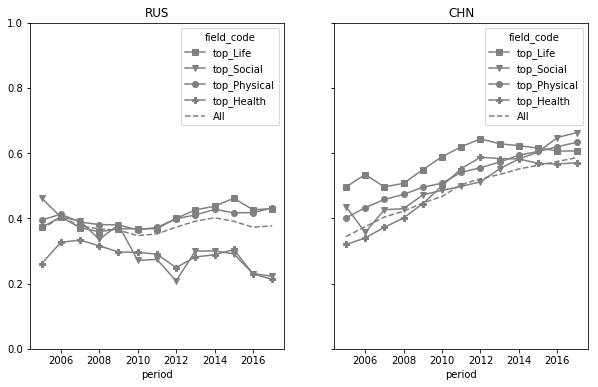

In [5]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(10,6))
l = ['RUS','CHN']

lstyles = ['s-','v-','o-','P-','--']
for i in range(2):
    a = ax[i]
    a.set_ylim((0,1))
    a.set_title(l[i])
    #breakpoint()
    chnrus.xs(l[i]).T.plot(ax=a,style=lstyles,c='gray')#,marker='.',ls='-.',c='black')

In [ ]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mapdata = pd.DataFrame(glob.loc[idx[:,'All','euclid',2017]])
world = pd.merge(world[['geometry', 'iso_a3']],mapdata,left_on='iso_a3',right_index=True)

f,ax = plt.subplots(1,figsize=(15,9))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='value',cmap='gray',legend=True,cax=ax)
ax.set_axis_off()
plt.show()


## Means and stds in Transition countries by TOP disciplines

## Plotting LocalShares - main logic in Dropbox/Python/AllScopusJournals/Paper/paper_plots.py

In [38]:
locals = pd.read_csv('localShares.csv',index_col='Country')
locals.head()

,Documents,localDocs,localShare
Country,,,
Finland,44916,340.0,0.007570
Sweden,93135,1107.0,0.011886
Austria,54210,667.0,0.012304
Denmark,62937,966.0,0.015349
Norway,46791,820.0,0.017525


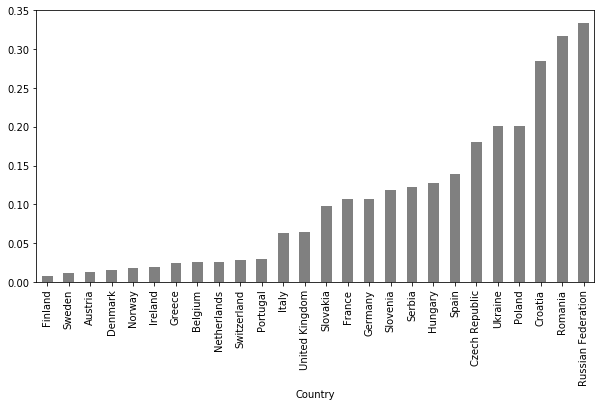

In [36]:
locals.localShare.plot(kind='bar',color='gray',figsize=(10,5))

## Output to excel

In [ ]:
writer = pd.ExcelWriter('findings.xlsx')
corr_full.loc[usedIndicators,usedIndicators].to_excel(writer,sheet_name='corr_full')
status.to_excel(writer,sheet_name='group_means_stds')
writer.save()

In [ ]:
counts = (glob.unstack('country_code').groupby(level=['field_code','period']).count()/10)
counts = counts[[col for col in counts.columns if not col.startswith('_')]].sum(axis=1).unstack('period')
counts.sort_values(2017)

## Output CSVs as an appendix

In [1]:
glob

NameError: name 'glob' is not defined